In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Example 1

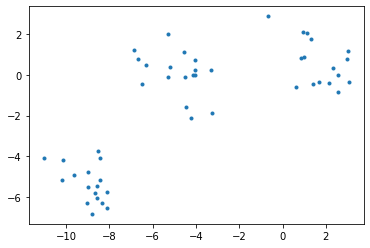

In [3]:
d = make_blobs(n_samples=50,random_state=170)[0]

plt.figure()
plt.plot(d[:,0],d[:,1],'.')
plt.show()

In [4]:
model = PCA(n_components=2)
model.fit(d)
dt = model.transform(d)

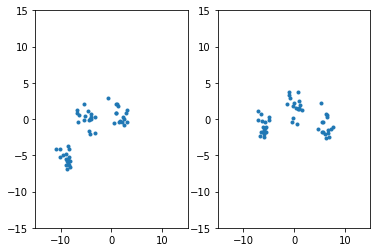

In [5]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(d[:,0],d[:,1],'.')
plt.xlim([-15,15])
plt.ylim([-15,15])

plt.subplot(1,2,2)
plt.plot(dt[:,0],dt[:,1],'.')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.show()

In [6]:
print(model.explained_variance_ratio_)

[0.89108069 0.10891931]


# Example 2

In [8]:
X,y = load_digits(return_X_y=True)
print('X',X.shape)
print('y',len(y))

X (1797, 64)
y 1797


7


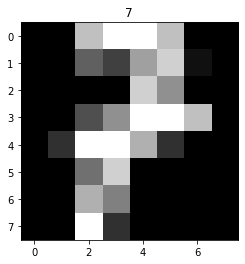

In [17]:
i = 1200
img = X[i,:]
print(y[i])
img = np.reshape(img,(8,8))

plt.figure()
plt.title(y[i])
plt.imshow(img,cmap='gray')
plt.show()

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
model = PCA(n_components=2)
model.fit(Xtrain)
X2train = model.transform(Xtrain)
print('Xtrain',Xtrain.shape) 
print('X2train',X2train.shape)

Xtrain (1257, 64)
X2train (1257, 2)


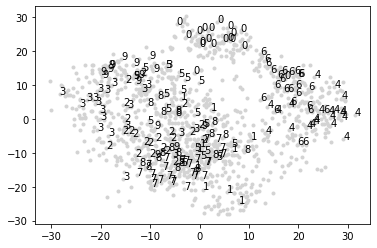

[0.14870031 0.13631282]


In [30]:
idx = np.random.permutation(1257)[:200]

plt.figure()
plt.plot(X2train[:,0],X2train[:,1],'.',color='lightgray')
for i in idx:
    plt.text(X2train[i,0],X2train[i,1],str(ytrain[i]))
plt.show()
print(model.explained_variance_ratio_)

[0.15 0.14 0.12 0.08 0.06 0.05 0.04 0.04 0.03 0.03 0.02 0.02 0.02 0.02
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
1 0.14870030676073526
2 0.2850131259047036
3 0.4050894277626029
4 0.4896848718202784
5 0.5460746306574977
6 0.5953105958715008
7 0.6379375470307745
8 0.6736125970106094
9 0.7070012722502601
10 0.7379775703887035
11 0.761842029118857
12 0.7850256436516256
13 0.8034865453874042
14 0.821096028643434
15 0.8360106001170642
16 0.8504505061363888
17 0.8637930765800508
18 0.8758244856590471
19 0.8860070312287812
20 0.8953636613127121
21 0.9042293632852675
22 0.9121733816284193
23 0.91955717784586
24 0.9267768081198763
25 0.9333934769573192
26 0.9394352220296781
27 0.9452163182257435
28 0.9502917400754823
29 0.9550939352931395
30 0.9593488470719087
31 0.9631995531673675
32 0.966

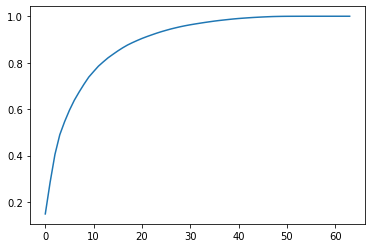

In [36]:
model = PCA(n_components=64)
model.fit(Xtrain)
X2train = model.transform(Xtrain)
print(np.round(model.explained_variance_ratio_,2))

var_acc = np.cumsum(model.explained_variance_ratio_)
for i,v in enumerate(var_acc):
    print(i+1,v)

plt.figure()
plt.plot(var_acc)
plt.show()